In [1]:
%matplotlib notebook
import tkinter
import matplotlib
import platform
if platform.system() not in ['Linux', 'Darwin'] and not platform.system().startswith('CYGWIN'):
    matplotlib.use('TKAgg')
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D
from IPython import display
plt.rcParams.update({'font.size': 8})

# Hello World mnist (pytorch)

In [4]:
import glob
import random
import os
import cv2
os.environ['TRIDENT_BACKEND'] = 'pytorch'
import trident as T
from trident import *

In [5]:
dataset=T.load_mnist('mnist','train',is_flatten=True) #讀取mnist數據集
dataset.image_transform_funcs=[normalize(127.5,127.5)] #在圖像預處理流程中加入正規化

img_list=[random.choice(dataset.get_all_data()).reshape((28,28)) for i in range(10)]#從全體圖像數據(get_all_data())抽10筆
                        
merged_img=array2image(np.concatenate(img_list,axis=1)) #沿著x軸(axis=1)疊合後，利用array2image轉成圖檔


merged_img #顯示圖片

archive file is already existing, donnot need download again.
archive file is already existing, donnot need download again.
Mapping data  in train scenario  success, total 60000 record addeds.
Mapping label  in train scenario  success, total 60000 records added.
Mapping class_names  in en-US   success, total 10 class names added.


In [6]:
fdataset=T.load_mnist('fashion-mnist','train',is_flatten=True) #讀取fashion mnist數據集
dataset.image_transform_funcs=[normalize(127.5,127.5)]  #在圖像預處理流程中加入正規化

img_list2=[random.choice(fdataset.get_all_data()).reshape((28,28)) for i in range(10)]#從全體圖像數據(get_all_data())抽10筆               
merged_img2=array2image(np.concatenate(img_list2,axis=1)) #沿著x軸(axis=1)疊合後，利用array2image轉成圖檔

merged_img2 #顯示圖片

archive file is already existing, donnot need download again.
archive file is already existing, donnot need download again.
Mapping data  in train scenario  success, total 60000 record addeds.
Mapping label  in train scenario  success, total 60000 records added.
Mapping class_names  in en-US   success, total 10 class names added.


In [7]:
#設計網路結構基礎型
net1=Sequential(
    Dense(64,use_bias=False,activation='leaky_relu'),
    Dense(32,use_bias=False,activation='leaky_relu'),
    Dense(16,use_bias=False,activation='leaky_relu'),
    Dense(2,use_bias=False,activation=None),
    Dense(10,use_bias=False,activation='softmax'))

In [20]:
#加入批次正規化
net2=Sequential(
    Dense(64,use_bias=False,activation=None),
    BatchNorm(affine=False),
    LeakyRelu(),
    Dense(32,use_bias=False,activation=None),
    BatchNorm(affine=False),
    LeakyRelu(),
    Dense(16,use_bias=False,activation=None),
    BatchNorm(affine=False),
    LeakyRelu(),
    Dense(2,use_bias=False,activation=None),
    Dense(10,use_bias=False,activation='softmax'))

#加入Dropout
net3=Sequential(
    Dense(64,use_bias=False,activation=None),
    BatchNorm(affine=False),
    LeakyRelu(),
    Dropout(0.5),
    Dense(32,use_bias=False,activation=None),
    BatchNorm(affine=False),
    LeakyRelu(),
    Dense(16,use_bias=False,activation=None),
    BatchNorm(affine=False),
    LeakyRelu(),
    Dense(2,use_bias=False,activation=None),
    Dense(10,use_bias=False,activation='softmax'))



In [21]:
model1=Model(input_shape=[28*28],output=net1)\
    .with_optimizer(optimizer='Ranger',lr=2e-4)\
    .with_loss(CrossEntropyLoss)\
    .with_metric(accuracy)

model2=Model(input_shape=[28*28],output=net2)\
    .with_optimizer(optimizer='Ranger',lr=2e-4)\
    .with_loss(CrossEntropyLoss)\
    .with_metric(accuracy)

model3=Model(input_shape=[28*28],output=net3)\
    .with_optimizer(optimizer='Ranger',lr=2e-4)\
    .with_loss(CrossEntropyLoss)\
    .with_metric(accuracy)



In [22]:
model1.summary()
model2.summary()
model3.summary()

--------------------------------------------------------------------------------------------------------------------------------
                            Layer (type)                   Output Shape                    Weight Shape      Bias Shape          Param #          FLOPS #
                                 dense_1                       [-1, 64]                       [64, 784]                           50,176        100,351.0
                                 dense_2                       [-1, 32]                        [32, 64]                            2,048          4,095.0
                                 dense_3                       [-1, 16]                        [16, 32]                              512          1,023.0
                                 dense_4                        [-1, 2]                         [2, 16]                               32             63.0
                                 dense_5                       [-1, 10]                         [10, 

model 0                   Step: 41s796ms | Loss: 1.537   | Accuracy: 92.188%  | learning rate: 2.000e-04 | epoch: 0 ( 0/2500 )
model 1                   Step: 19ms     | Loss: 2.303   | Accuracy: 8.594%   | learning rate: 2.000e-04 | epoch: 0 ( 0/2500 )
model 2                   Step: 21ms     | Loss: 2.302   | Accuracy: 10.156%  | learning rate: 2.000e-04 | epoch: 0 ( 0/2500 )

model 0                   Step: 15s283ms | Loss: 1.524   | Accuracy: 93.984%  | learning rate: 2.000e-04 | epoch: 0 ( 500/2500 )
model 1                   Step: 17ms     | Loss: 2.266   | Accuracy: 21.875%  | learning rate: 2.000e-04 | epoch: 0 ( 500/2500 )
model 2                   Step: 20ms     | Loss: 2.272   | Accuracy: 25.859%  | learning rate: 2.000e-04 | epoch: 0 ( 500/2500 )

model 0                   Step: 17s991ms | Loss: 1.512   | Accuracy: 95.312%  | learning rate: 2.000e-04 | epoch: 0 ( 1000/2500 )
model 1                   Step: 17ms     | Loss: 2.208   | Accuracy: 36.484%  | learning rate: 2.000

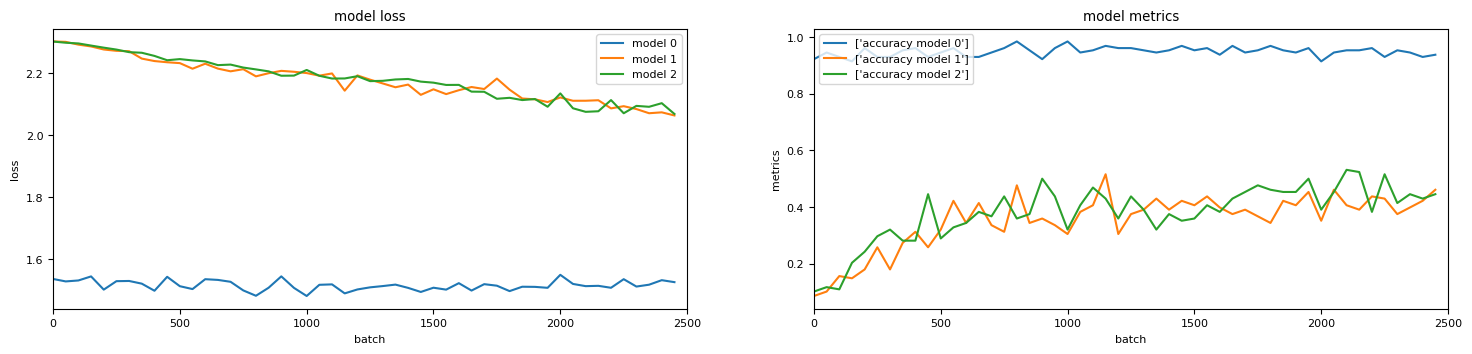

In [23]:
plan=TrainingPlan()\
    .add_training_item(model1)\
    .add_training_item(model2)\
    .add_training_item(model3)\
    .with_data_loader(dataset)\
    .within_minibatch_size(128)\
    .print_progress_scheduling(500,unit='batch')\

plan.only_steps(num_steps=2500,collect_data_inteval=50,keep_weights_history=True,keep_gradient_history=True)

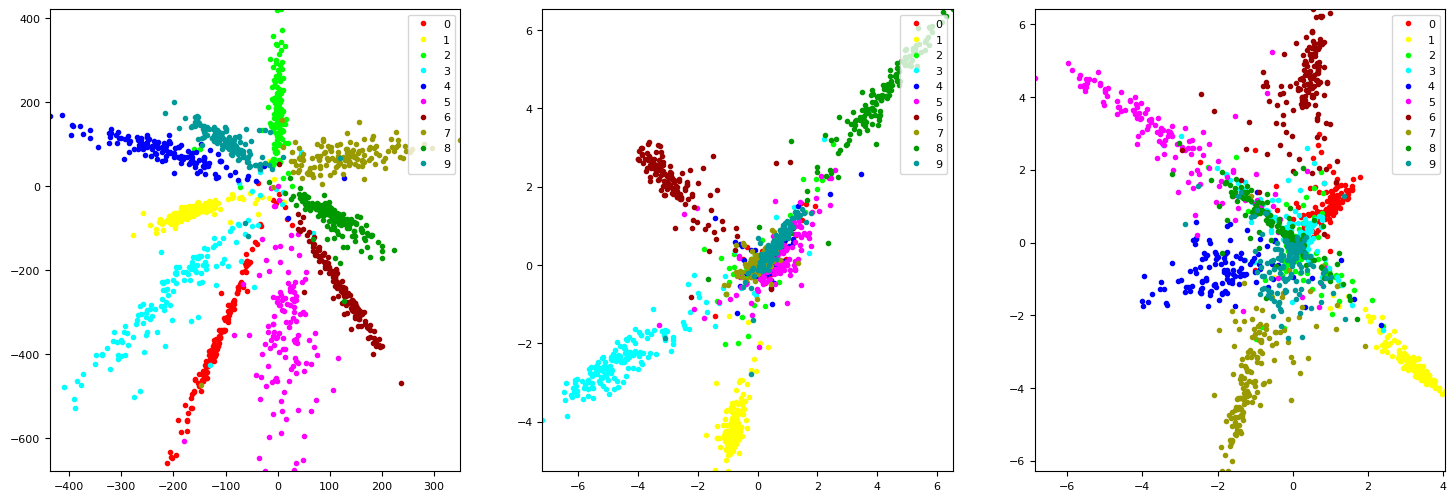

In [30]:

#plan.training_items[0].model[:4]
#plan.training_items[1].model[:11]


def centerloss_plot(plt,feat, labels,title=''):
    
    c = ['#ff0000', '#ffff00', '#00ff00', '#00ffff', '#0000ff',
         '#ff00ff', '#990000', '#999900', '#009900', '#009999']
    for i in range(10):
        plt.plot(feat[labels == i, 0], feat[labels == i, 1], '.', c=c[i])
    plt.legend(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], loc = 'upper right')
    plt.xlim(xmin=feat[:,0].min(),xmax=feat[:, 0].max())
    plt.ylim(ymin=feat[:,1].min(),ymax=feat[:, 1].max())
    plt.title(title)
    
    
    
fig = plt.figure(figsize=(18,6)) 
plt.clf()
plt.ioff()  # is not None:
for k in [1,2,3]:
    plt.subplot(1, 3, k)
    feats_result=[]
    label_result=[]
    fm=Sequential(plan.training_items[k-1].model[:-1])
    for i,(data,label) in enumerate(dataset):
        data=to_tensor(data)
        feats=fm(data)
        feats=to_numpy(feats)
        
        feats_result.append(feats)
        label_result.append(label)  
        if i==10:
            break

    feats_result=np.concatenate(feats_result,axis=0)
    label_result=np.concatenate(label_result,axis=0)
    plt.title('model {0}'.format(i))
    centerloss_plot(plt,feats_result,label_result)
display.display(plt.gcf())
plt.close(fig)

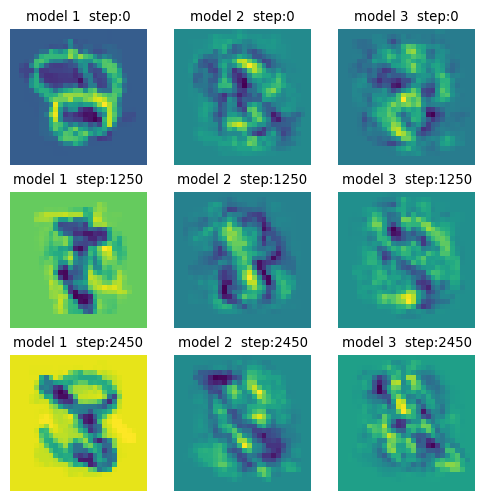

In [44]:
grad_dict={}

for i in  range(3):
    grad_dict[i]=[]
    for j in range(len(plan.training_items[i].gradients_history)):
        grad_dict[i].append(to_numpy(plan.training_items[i].gradients_history[j]['0.weight']).copy().mean(0))
        
fig =plt.figure(figsize=(6,6))
plt.clf()
plt.ioff()  
for j in range(3):
    for i in [1,2,3]:
        plt.subplot(3,3, 3*j+i)
        n=[0,len(grad_dict[i-1])//2,len(grad_dict[i-1])-1][j]
        grad_grid=grad_dict[i-1][n].reshape([28,28])
        plt.pcolor(grad_grid)
        plt.title('model {0}  step:{1}'.format(i,n*50))
        plt.axis("off")

display.display(fig)
plt.close(fig)